# =====================================================
# <span style='color:brown'> Name - Abhishek Kumar.
# <span style='color:brown'> Batch Number -  DS2309.
# =====================================================

# **************************************
# <span style='color:brown'>Project Name:- Zomato Restaurant
# **************************************

## Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


## Dataset Link-  
•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx

•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv


# <span style='color:red'>Importing Required Liberaries <span style='color:red'>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv(r"C:\Users\ASHISH\Desktop\zomato.csv",encoding='latin1')

In [13]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [21]:
print('Number of Rows :',df.shape[0])
print('Number of Columns :',df.shape[1])

Number of Rows : 9551
Number of Columns : 21


In [18]:
# This will check if any duplicate Value
df.duplicated().sum() 

0

In [19]:
#check if any whitespace, 'NA' or '-' exist in dataset.
df.isin([' ','NA','-']).sum().any()

False

## Checking Nulls

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


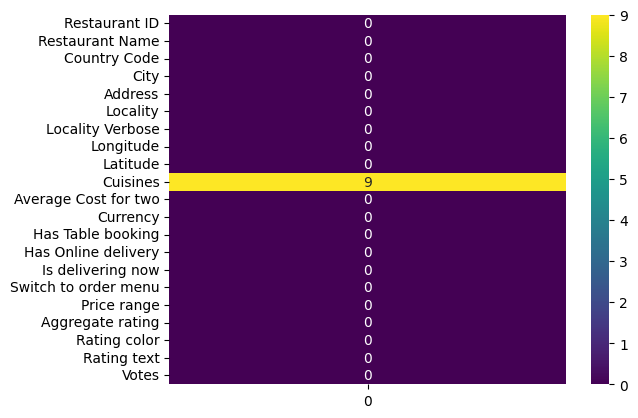

In [37]:
sns.heatmap(df.isna().sum().to_frame(),annot=True,cmap='viridis')
print(df.isnull().sum())

In [38]:
# Fill nulls with Cuisines column Mode.
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

Comment  - Cuisines have 9 Nulls. And It Filled by Mode of that column.

# <span style='color:orange'>Exploratory Data Analysis 

## Univariate Analysis 

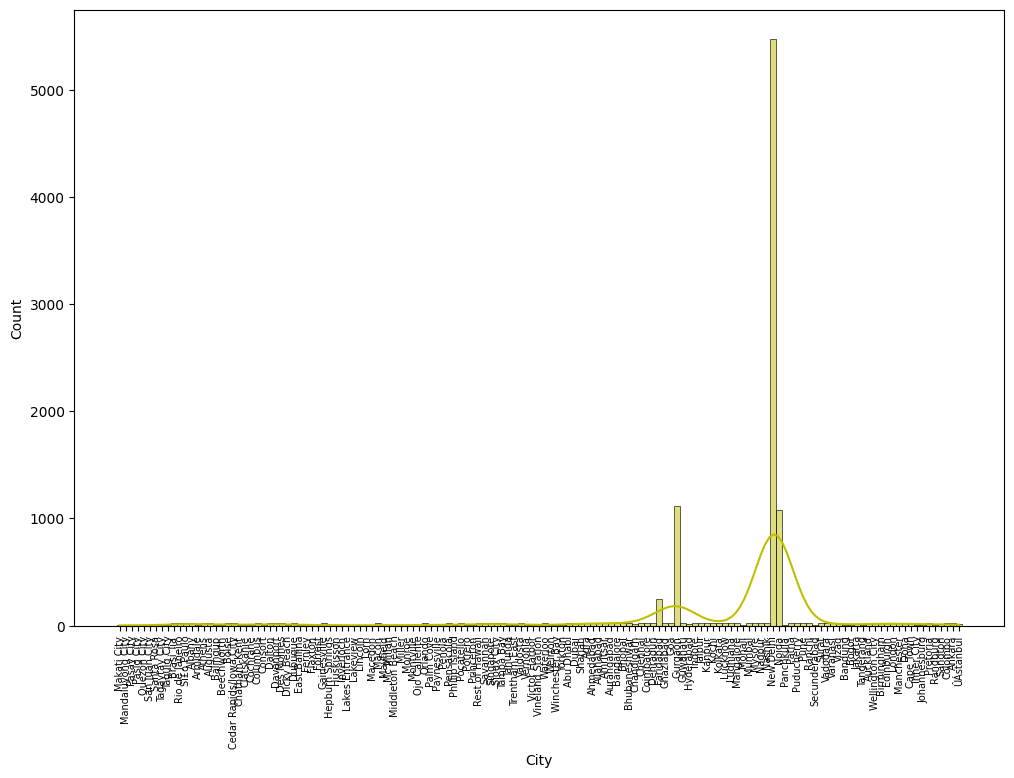

In [58]:
plt.figure(figsize=(12,8))
sns.histplot(df['City'],kde=True,color='y')
plt.xticks( fontsize=7,rotation=90)
plt.show()

Comment- NewDelhi, Noida, Gurgaon and faridabad have high demand of Zomato.

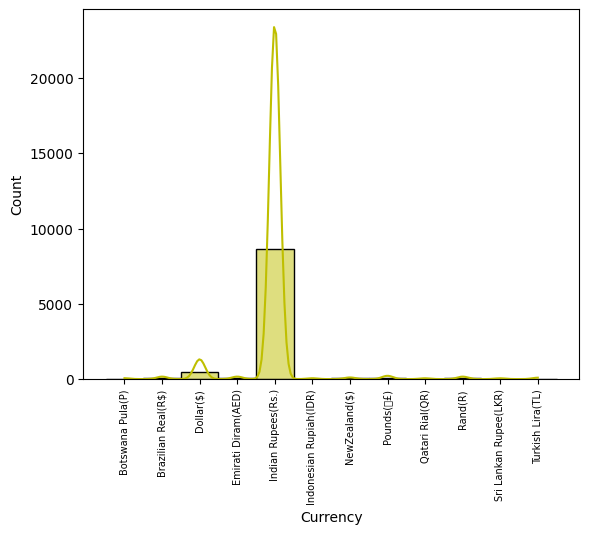

In [56]:
sns.histplot(df['Currency'],kde=True,color='y')
plt.xticks( fontsize=7,rotation=90)
plt.show()

In [ ]:
Comment -  Mostly Indian Rupee used in transection for Zomato Orders.

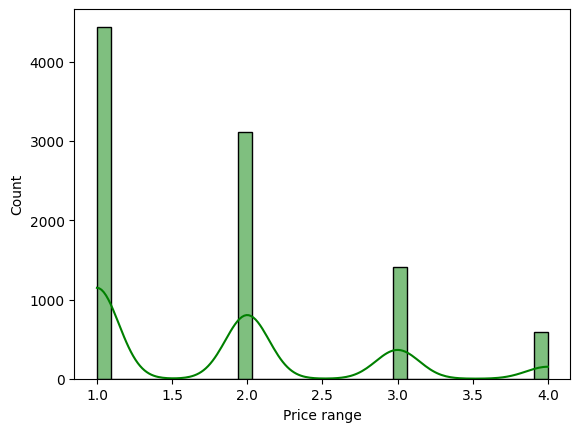

In [49]:
sns.histplot(df['Price range'],kde=True,color='g')
plt.show()

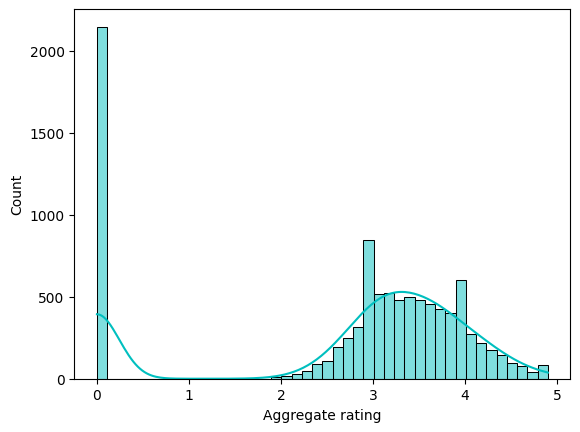

In [52]:
sns.histplot(df['Aggregate rating'],kde=True,color='c')
plt.show()

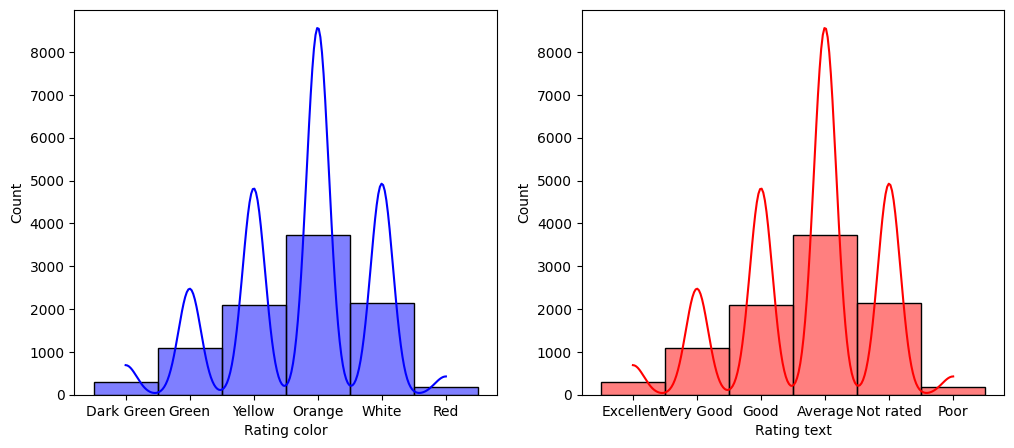

In [47]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Rating color'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Rating text'],kde=True,color='r')
plt.show()

## Bivariate Analysis 

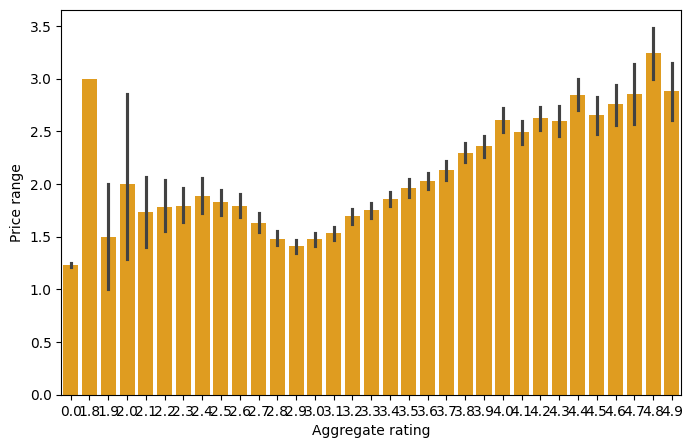

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df,x='Aggregate rating', y='Price range',color='orange')
plt.show()

## Label Endoding

In [73]:
pd.set_option('display.max_columns', None)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [68]:
object_columns = df.select_dtypes(include=['object'])

In [70]:
object_column_names = object_columns.columns.tolist()
object_column_names

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [65]:
df['Restaurant ID'].value_counts()

Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: count, Length: 9551, dtype: int64

In [79]:
df['Locality'].value_counts()

Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Malviya Nagar                                   85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: count, Length: 1208, dtype: int64

In [80]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [78]:
df['Locality Verbose'].value_counts()

Locality Verbose
Connaught Place, New Delhi                    122
Rajouri Garden, New Delhi                      99
Shahdara, New Delhi                            87
Defence Colony, New Delhi                      86
Pitampura, New Delhi                           85
                                             ... 
Ramada Gurgaon Central, Sector 44, Gurgaon      1
Sector 5, Gurgaon                               1
Sector 53, Gurgaon                              1
The Claremont, MG Road, Gurgaon                 1
Moda, ÛÁstanbul                                 1
Name: count, Length: 1265, dtype: int64

In [66]:
df['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [81]:
df['Currency'].value_counts()

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

In [74]:
df['Has Table booking'].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [75]:
df['Has Online delivery'].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [76]:
df['Is delivering now'].value_counts()

Is delivering now
No     9517
Yes      34
Name: count, dtype: int64

In [77]:
df['Switch to order menu'].value_counts()

Switch to order menu
No    9551
Name: count, dtype: int64

In [84]:
# column contain unique value needs to drop.Because it is no more useful for model training.
df.drop(columns=['Switch to order menu','Restaurant ID'],axis=1,inplace=True)

In [91]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Assuming 'df' is your DataFrame containing the categorical columns
categorical_columns = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 
                       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 
                       'Is delivering now', 'Rating color', 'Rating text']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [92]:
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3749,162,73,8685,171,172,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314
1,3173,162,73,6055,593,601,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591
2,2897,162,75,4684,308,314,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270
3,4707,162,75,8690,862,875,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365
4,5523,162,75,8689,862,875,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229


# Statistical Analysis 

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant Name,9551.0,3653.204586,2142.917876,0.000000,1777.500000,3595.000000,5485.500000,7445.000000
Country Code,9551.0,18.365616,56.750546,1.000000,1.000000,1.000000,1.000000,216.000000
City,9551.0,78.301434,23.198915,0.000000,76.000000,88.000000,88.000000,140.000000
Address,9551.0,4542.439430,2565.717005,0.000000,2323.500000,4610.000000,6746.500000,8917.000000
Locality,9551.0,658.128468,315.866515,0.000000,381.000000,696.000000,921.000000,1207.000000
Locality Verbose,9551.0,677.304994,331.727449,0.000000,387.000000,707.000000,953.000000,1264.000000
Longitude,9551.0,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089
Latitude,9551.0,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.976980
Cuisines,9551.0,989.461732,514.176108,0.000000,497.000000,1127.000000,1353.500000,1824.000000
Average Cost for two,9551.0,1199.210763,16121.183073,0.000000,250.000000,400.000000,700.000000,800000.000000


# Correlation Between Datasets

<Axes: >

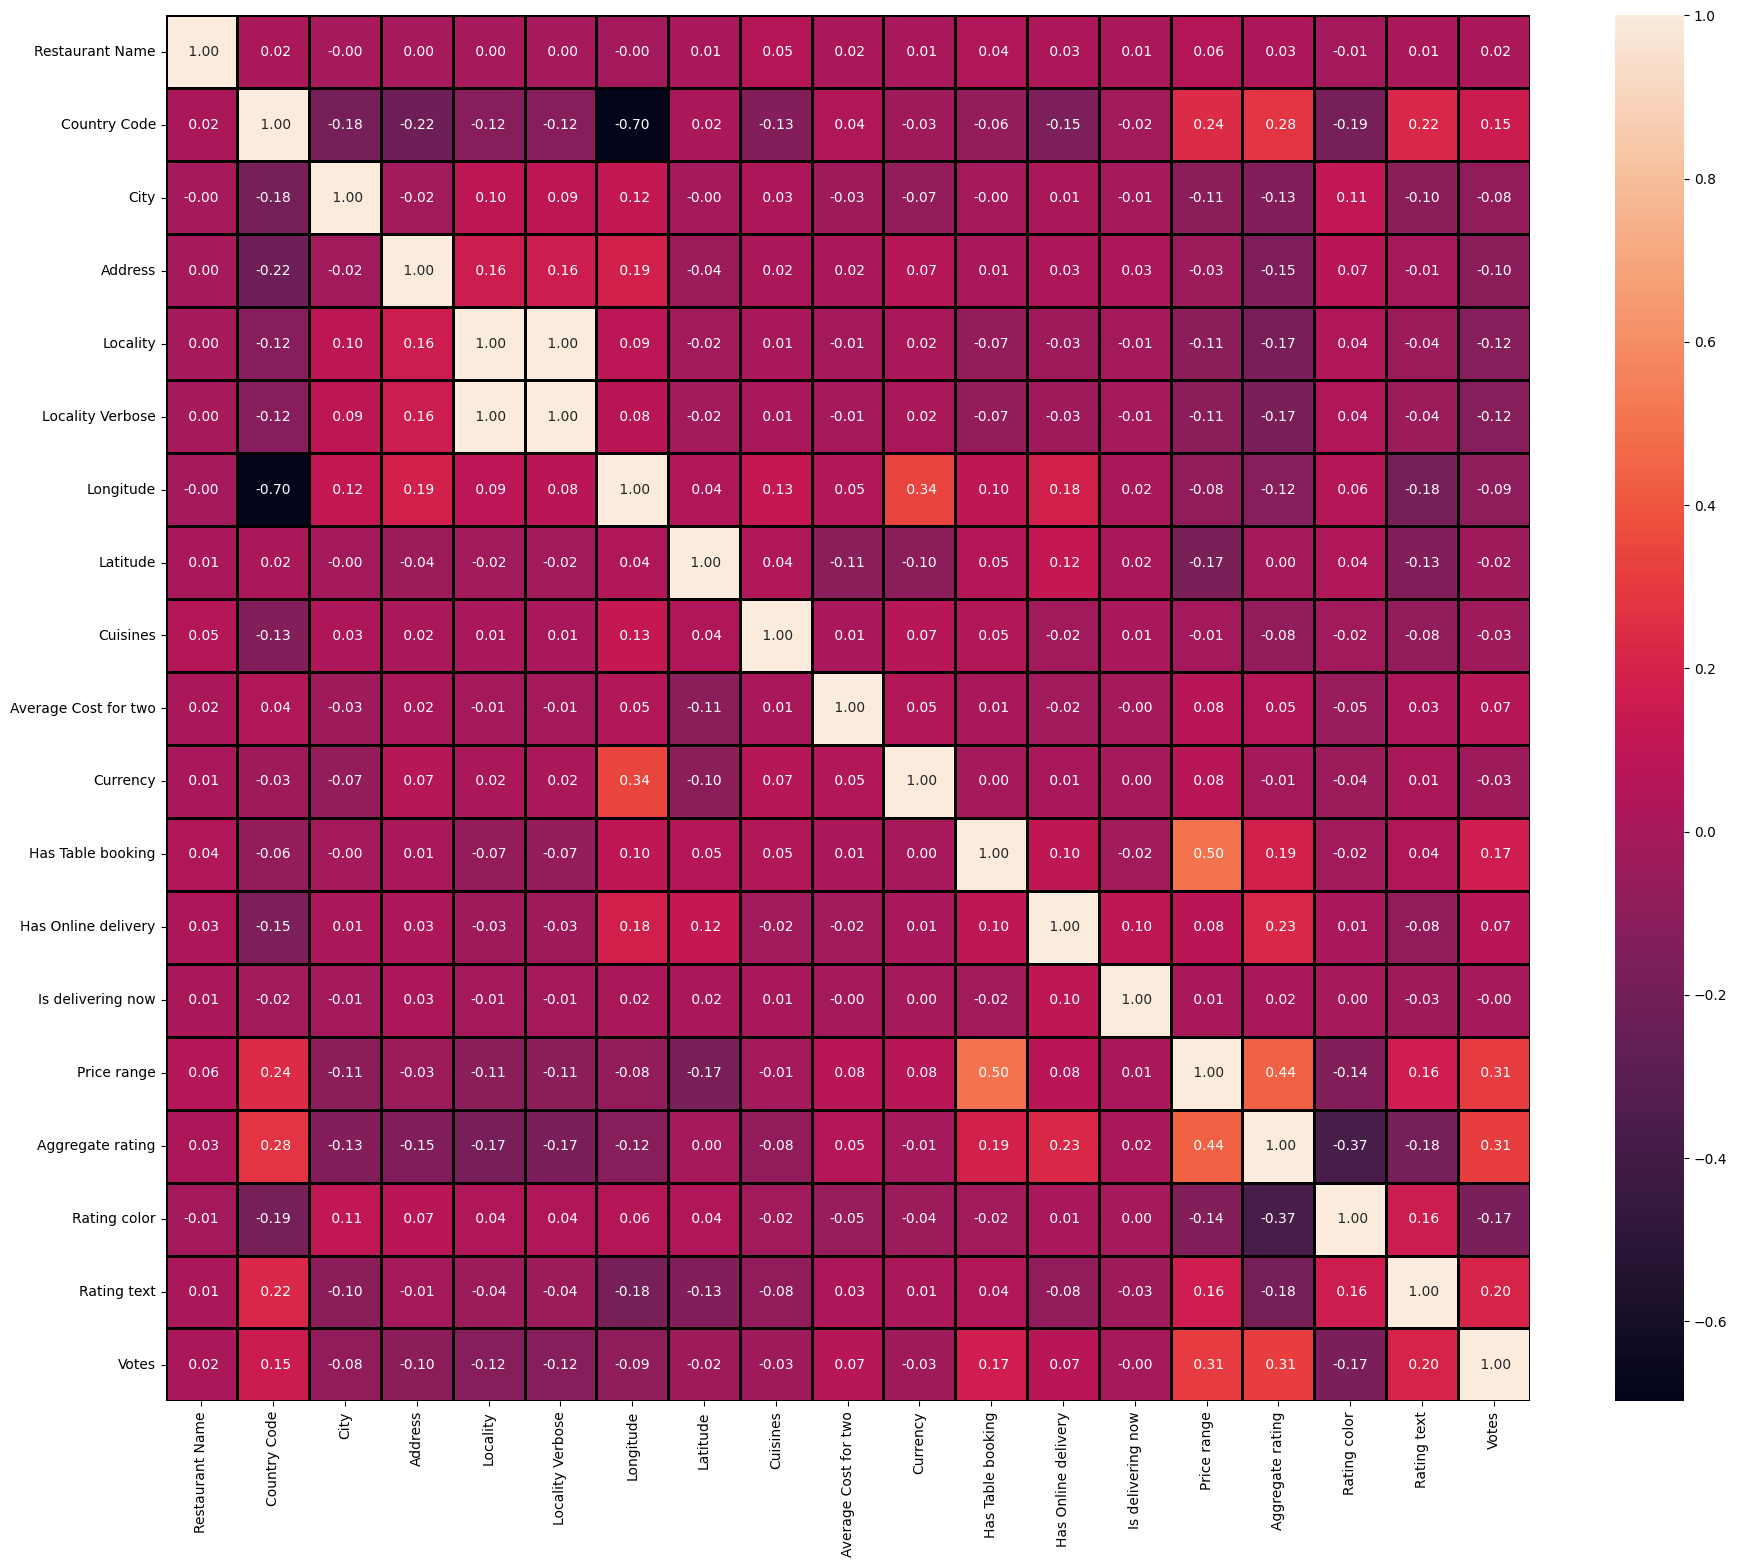

In [94]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

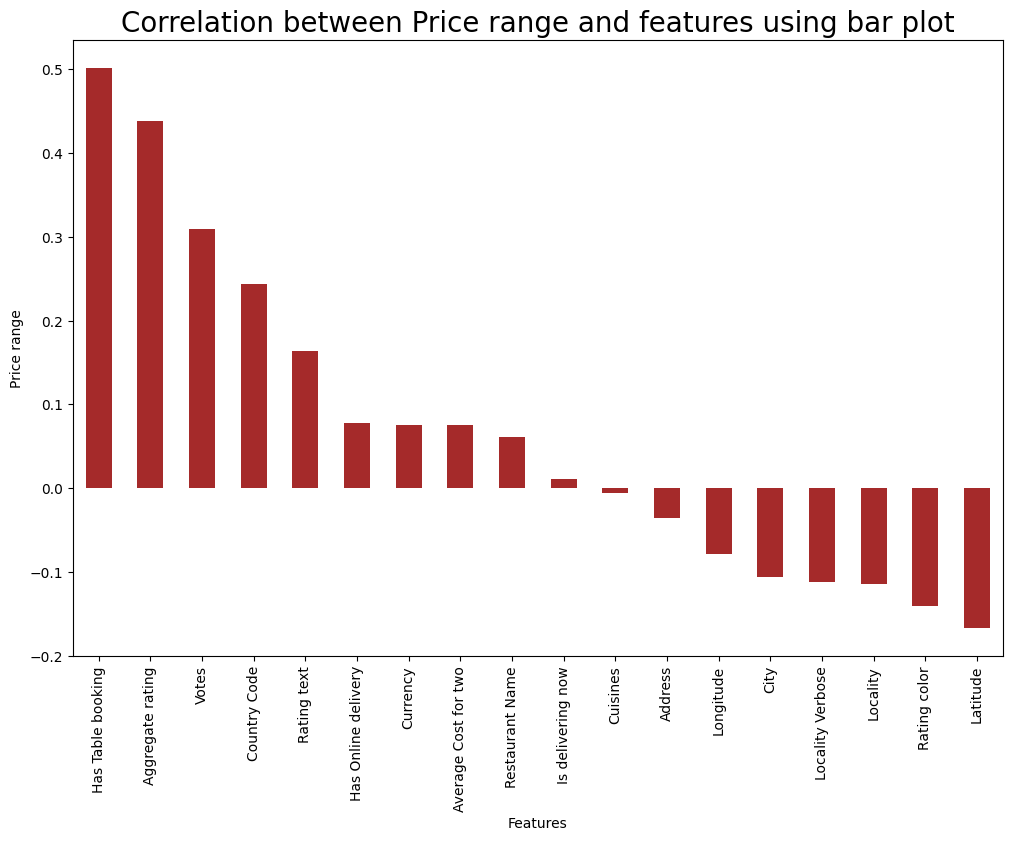

In [101]:
plt.figure(figsize=(12,8))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='brown')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Price range',fontsize=10)
plt.title('Correlation between Price range and features using bar plot',fontsize=20)
plt.show()

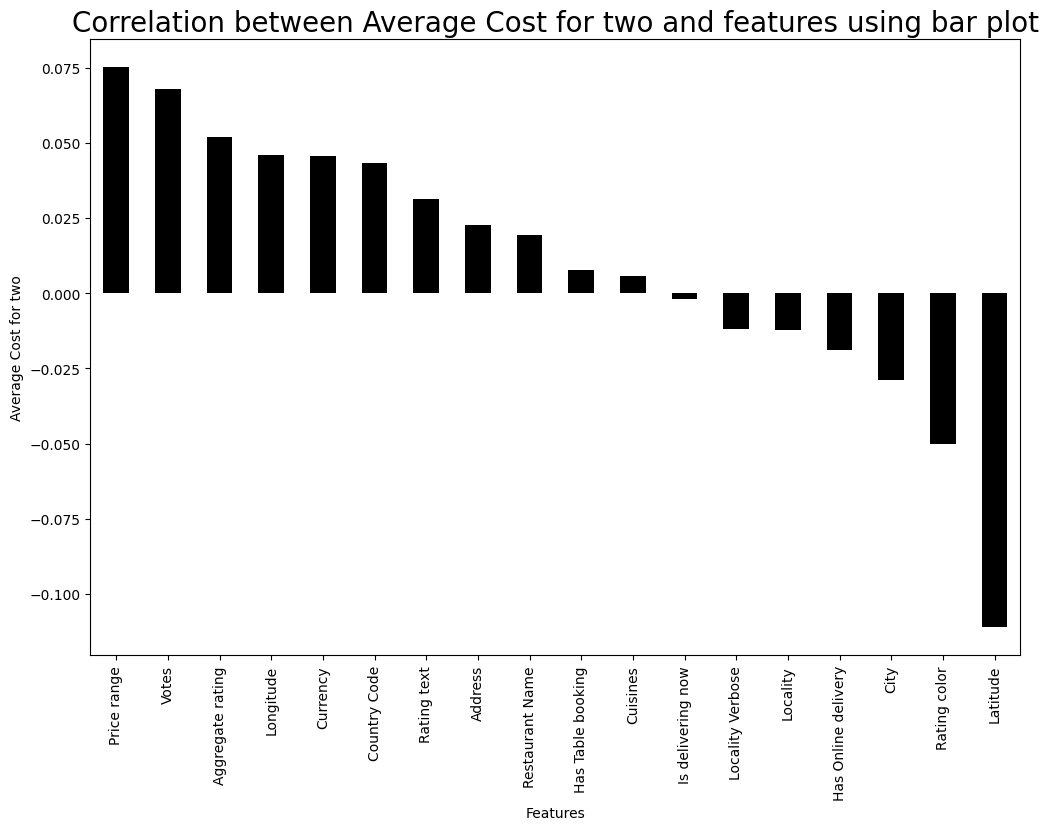

In [100]:
plt.figure(figsize=(12,8))
df.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='k')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Average Cost for two',fontsize=10)
plt.title('Correlation between Average Cost for two and features using bar plot',fontsize=20)
plt.show()

# <span style='color:brown'> Outlier Detection 

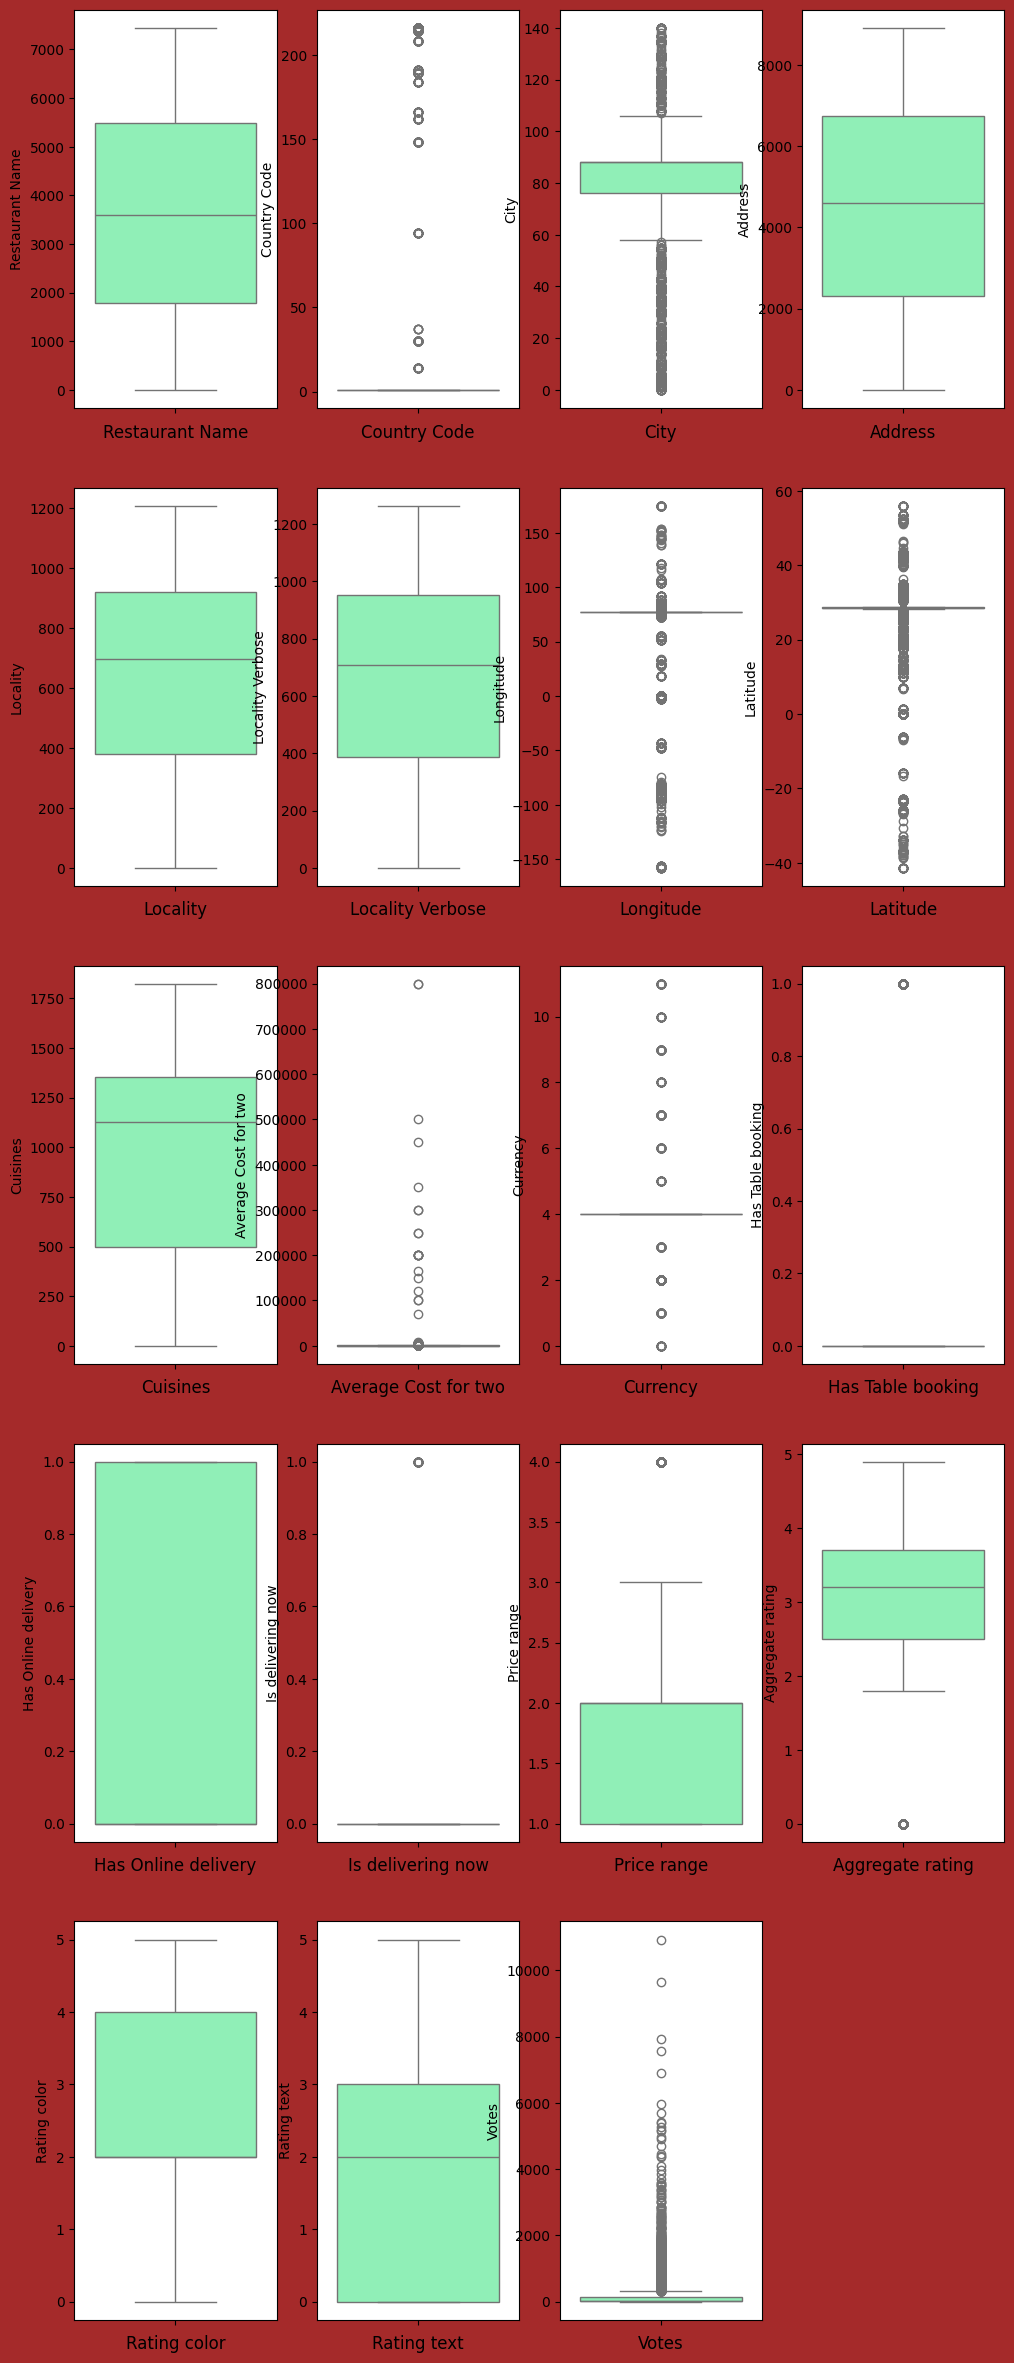

In [103]:
plt.figure(figsize=(12,30),facecolor='brown')
index=1
for column in df:
    if index <=20:
        ax = plt.subplot(5,4,index)
        sns.boxplot(df[column], palette='rainbow')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

Comment - [ 'Country Code', 'City','Longitude', 'Latitude','Average Cost for two', 'Currency', 'Has Table booking',
    'Has Online delivery', 'Is delivering now','Votes'] these column contains Outlier.

# <span style='color:green'>Outlier Removal

In [107]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = [ 'Country Code', 'City','Longitude', 'Latitude', 'Currency', 'Has Table booking',
    'Has Online delivery', 'Is delivering now','Votes']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores 
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

# <span style='color:brown'>Checking Skewness Of Dataset

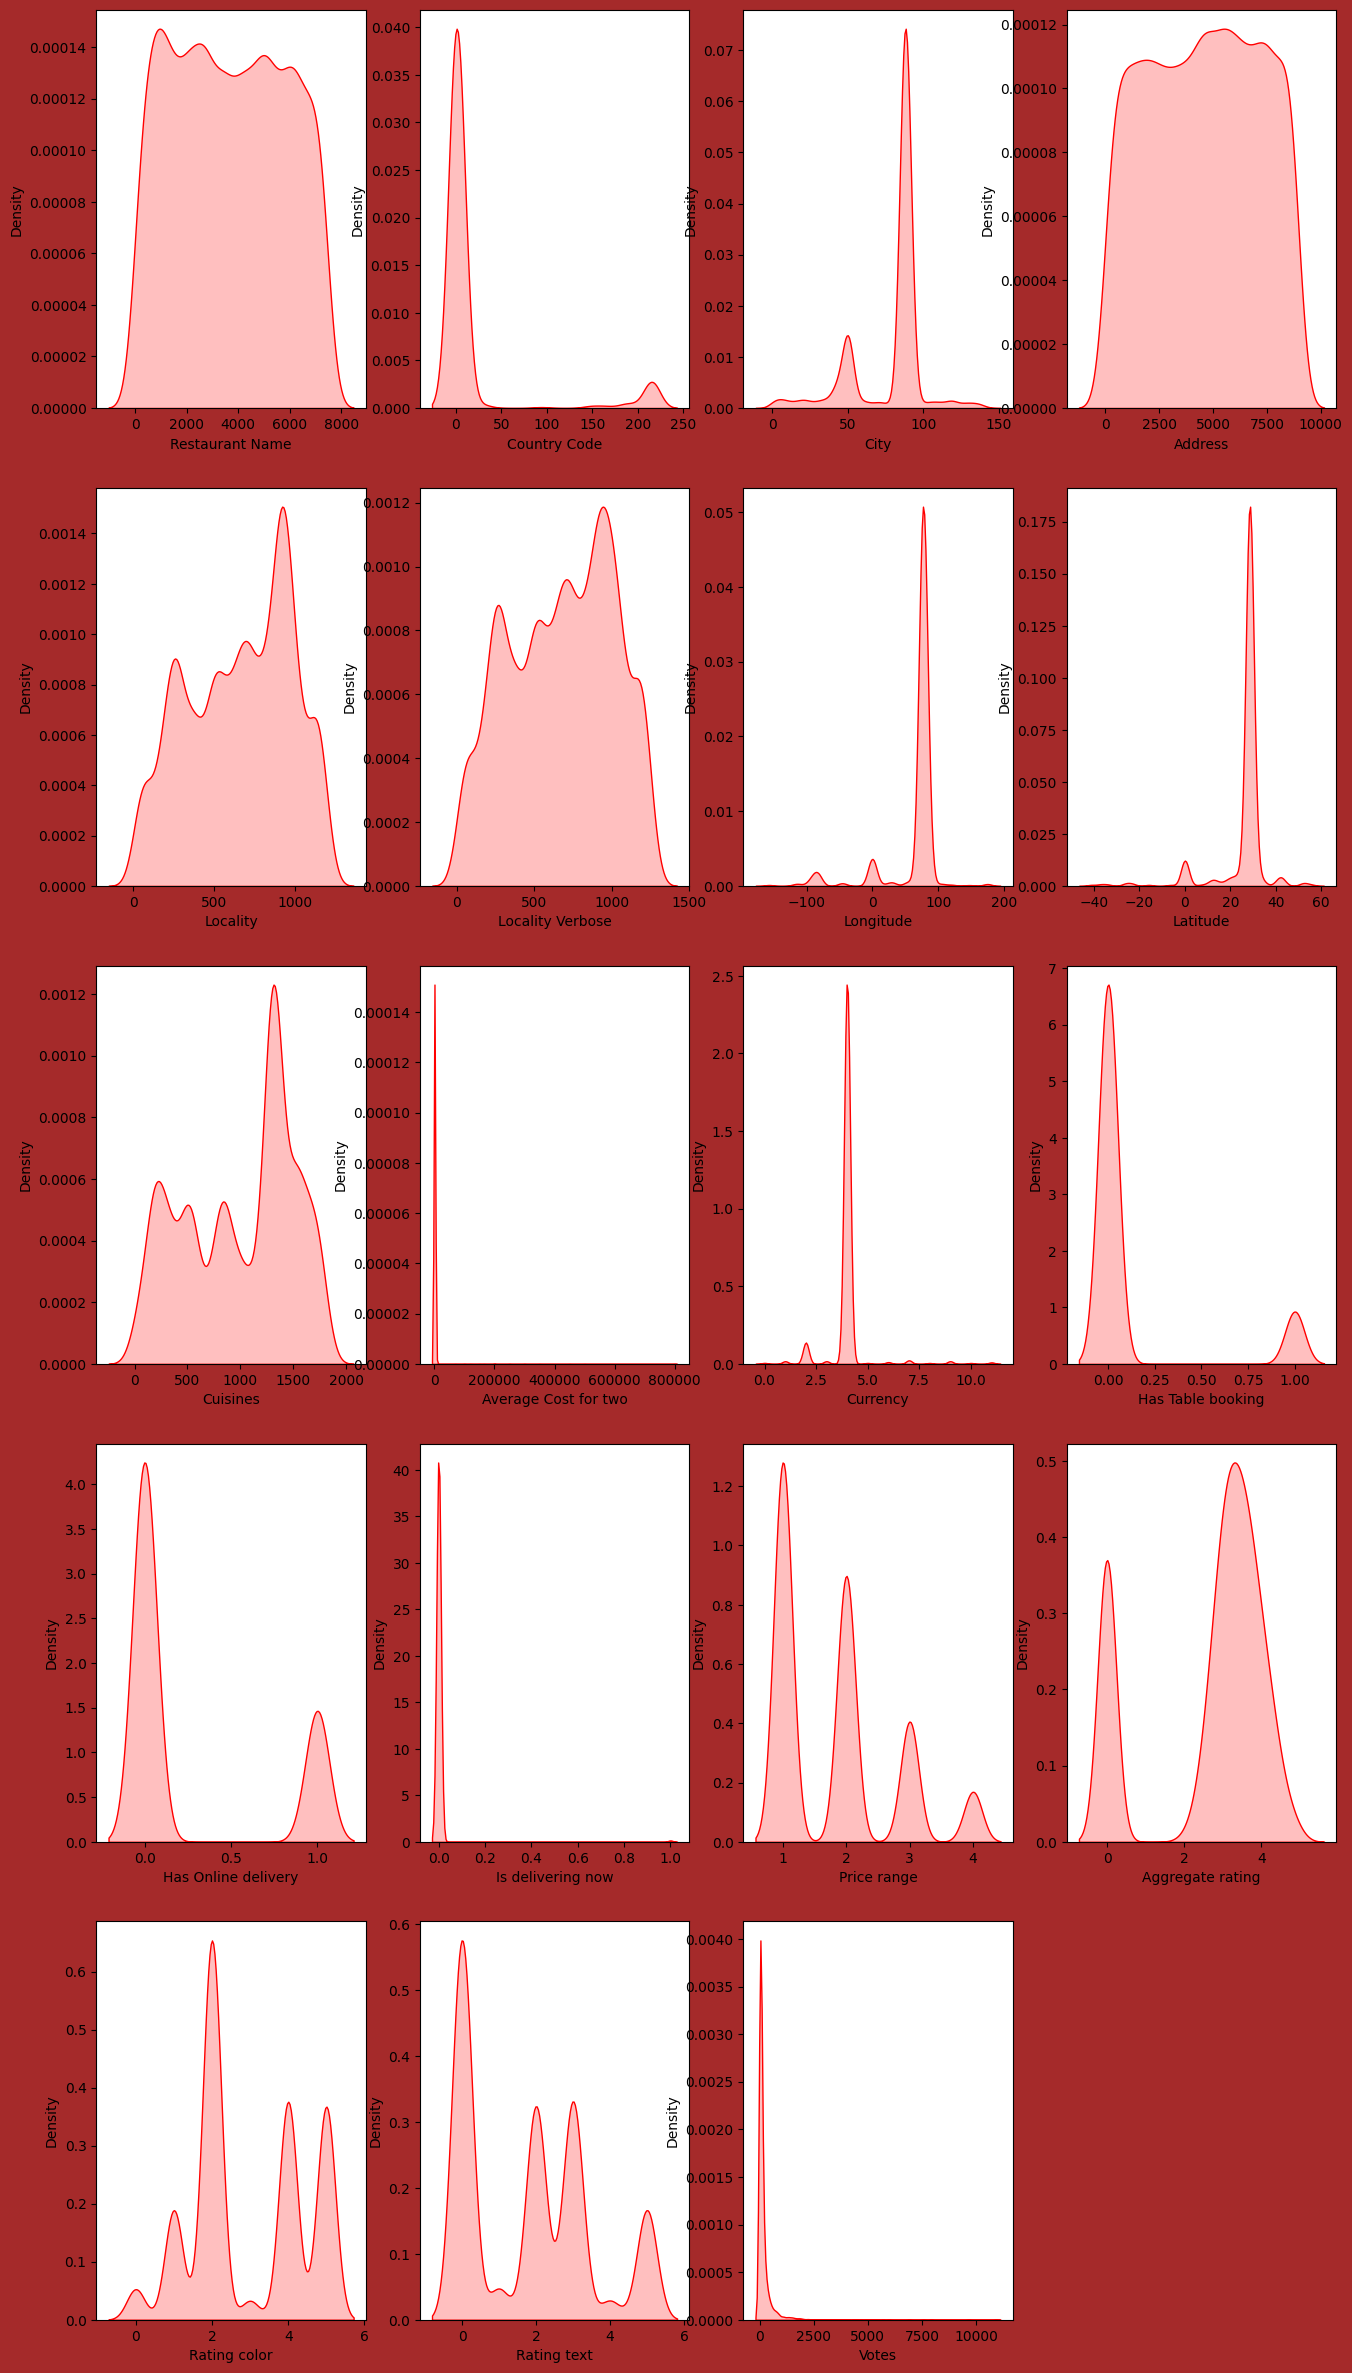

In [106]:
plt.figure(figsize=(16,30), facecolor='brown')
plotnumber=1
for column in df:
    if plotnumber <=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [108]:
df.skew()

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

Comment - 
* [ 'Country Code',  'Cuisines','Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery',
           'Is delivering now', 'Rating color', 'Rating text', 'Votes'] these ccolumn contain right skewness.
* ['City', 'Longitude', 'Latitude','Aggregate rating'] these column have  left skewness.

# <span style='color:green'> Skewness Removing

In [116]:
# columns with right-skewed data containing zeros
right_skewed_columns =  [ 'Country Code', 'Cuisines','Average Cost for two', 'Currency', 'Has Table booking',
                         'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Votes']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[right_skewed_columns] = scaler.fit_transform(df[right_skewed_columns].values)

In [114]:
from scipy.stats import boxcox

# Columns with left-skewed data containing zeros
left_skewed_columns = ['City', 'Longitude', 'Latitude', 'Aggregate rating']

# Add a small constant to ensure all data points are positive
df[left_skewed_columns] += abs(df[left_skewed_columns].min()) + 1

# Apply Box-Cox transformation
df[left_skewed_columns] = df[left_skewed_columns].apply(lambda x: boxcox(x)[0])

In [117]:
df.skew()

Restaurant Name          0.044637
Country Code             2.780353
City                    -0.194867
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude                0.562846
Latitude                 0.413856
Cuisines                -0.079998
Average Cost for two     0.381610
Currency                 0.289724
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.513251
Rating color            -0.070466
Rating text              0.010917
Votes                    0.026434
dtype: float64

# <span style='color:orange'>Spliting data into Feature and Target variable

In [119]:
feature_columns=['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
        'Currency', 'Has Table booking','Has Online delivery', 'Is delivering now', 
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
label_columns=['Average Cost for two']
labelcolumn=['Price range']

In [120]:
X = df[feature_columns]
Y = df[labelcolumn]
y = df[label_columns]

# <span style='color:magenta'>Feature Scaling

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# variance_inflation_factor

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

In [124]:
vif

,VIF,Features
0,1.006884,Restaurant Name
1,1.701264,Country Code
2,1.052690,City
3,1.103479,Address
4,953.236569,Locality
5,952.263060,Locality Verbose
6,1.269590,Longitude
7,1.064602,Latitude
8,1.042254,Cuisines
9,1.117203,Currency


* 1 < VIF < 5: Moderate multicollinearity. The variance of the coefficient is moderately inflated.
* VIF > 5: High multicollinearity. 

# <span style='color:orange'>Machine learning Model  'Average Cost for two'

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [206]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)

# LogisticRegression

In [207]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    acc=accuracy_score(Y_test,Y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

Best accuracy is 65.51543694400837 on Random_state 51


# DecisionTreeRegressor

In [127]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [209]:
maxAccu1=0
maxRS1=0
for i in range(0,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=i)
    dtr.fit(X_train,Y_train)
    Y_pred1=dtr.predict(X_test)
    acc1=r2_score(Y_test,Y_pred1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS11=i
print('Best accuracy is', maxAccu1*100 ,'on Random_state', maxRS1)

Best accuracy is 35.29768917943067 on Random_state 0


# RandomForestRegressor

In [210]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

pred2 = rfr.predict(X_test)

# Evaluate the model using regression metrics
R3 = r2_score(Y_test, pred2)

print("R-squared:", R3*100)

R-squared: 64.38332906023648


# LinearRegression

In [211]:
from sklearn.linear_model import LinearRegression
rf=LinearRegression()
rf.fit(X_train,Y_train)
pred3=rf.predict(X_test)
R4=r2_score(Y_test,pred3)
print("R-squared:", R4*100)

R-squared: 51.176611548677585


# ExtraTreesRegressor

In [212]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X_train, Y_train)

pred5 = etr.predict(X_test)

# Evaluate the model using regression metrics
R6 = r2_score(Y_test, pred5)

print("R-squared:", R6*100)

R-squared: 61.74209710004117


# Cross Validation

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [214]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    Y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,Y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.4027210884353742
Mean squared error : 0.2876310832025118
Root Mean Squared Error: 0.5363124865248914


 R2 Score :
0.64489821544116


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.4287964416535845
Mean squared error : 0.3140228676085819
Root Mean Squared Error: 0.5603774331721272


 R2 Score :
0.6123156112387856


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.47671376242804814
Mean squared error : 0.6054421768707483
Root Mean Squared Error: 0.7781016494461044


 R2 Score :
0.25253698223351795


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.5353233551471328
Mean squared error : 0.4162521315700595
Root Mean Squared Error: 0.6451760469593237


 R2 Score :
0.48610604562901294


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.4294816912750792
Mean squared error : 0.3040303592157779
Root Mean Squared Error: 0.5513894805088123


 R2 Score :
0.6246520997816654


 Error of  XGB

# <span style='color:red'>Hyper Parameter Tuning

In [215]:
from sklearn.model_selection import GridSearchCV

In [227]:
parameter =  {
    'n_estimators': [100], 
    'max_depth': [ 10],      
    'min_samples_split': [2,3],  
    'min_samples_leaf': [1,2]    
}

In [228]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =5)

In [229]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.611 total time=   9.7s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.611 total time=   9.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.626 total time=  13.0s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.595 total time=   8.9s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.587 total time=   9.4s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.611 total time=   7.8s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.611 total time=   8.4s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.629 total time=   8

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'n_estimators': [100]},
             verbose=5)

In [230]:
GCV.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [231]:
Final_mod =  RandomForestRegressor(max_depth= 10,min_samples_leaf= 2,min_samples_split= 3,n_estimators=100 )
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,pred))
print('Mean squared error :', mean_squared_error(Y_test,pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.42132628654819826
Mean squared error : 0.29860604441539423
Root Mean Squared Error: 0.5464485743557158


 R2 Score of Final Model :
0.6313488164375249




# <span style='color:red'>Saving Model for 'Average Cost for two'

In [232]:
import joblib
joblib.dump(Final_mod,'Average_Cost_for_two.pkl')

['Average_Cost_for_two.pkl']

# <span style='color:pink'>Predictiom Based On Model

In [233]:
# Loading the saved model
Model = joblib.load('Average_Cost_for_two.pkl')

# prediction  DataFrame
actual = np.array(Y_test).flatten()
predicted = np.array(Model.predict(X_test)).flatten()
df_Predicted = pd.DataFrame({"Actual Values": actual, "Predicted Values": predicted}, index=range(len(actual)))
df_Predicted


,Actual Values,Predicted Values
0,1,1.205080
1,2,2.596983
2,1,1.303053
3,2,2.362580
4,3,2.712743
...,...,...
1906,1,1.100860
1907,3,3.344908
1908,2,1.165006
1909,2,1.784090


# <span style='color:orange'>Machine learning Model  'Price range'

In [160]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=.3)

In [163]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
etr = ExtraTreesRegressor()
adb=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,etr,dtc,adb,gbr,xgb]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    max_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
    print('Mean squared error :', mean_squared_error(y_test,max_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,max_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.322527180940362
Mean squared error : 0.21487745211270948
Root Mean Squared Error: 0.4635487591534568


 R2 Score :
0.778750653626387


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.34154871409150916
Mean squared error : 0.2347208411366581
Root Mean Squared Error: 0.48447996979922514


 R2 Score :
0.7583188362894842


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.44062714045584433
Mean squared error : 0.4078980968118469
Root Mean Squared Error: 0.6386690041107732


 R2 Score :
0.5800062481226527


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.4858239574950078
Mean squared error : 0.4332476538667273
Root Mean Squared Error: 0.6582155071606315


 R2 Score :
0.5539049849416697


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.3398648705467892
Mean squared error : 0.22952535251348527
Root Mean Squared Error: 0.4790880425490551


 R2 Score :
0.7636683899567791


 Error of  X

# Hyperparameter Tuning

In [164]:
from sklearn.model_selection import GridSearchCV

In [168]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [ 4, 5],
    'learning_rate': [ 0.1, 0.2],
    'subsample': [ 0.9, 1.0],
    'colsample_bytree': [ 0.9, 1.0]
}

In [169]:
gsc = GridSearchCV(XGBRegressor(),param_grid,verbose =5)

In [170]:
gsc.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.815 total time=   2.0s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.795 total time=   0.8s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.783 total time=   0.5s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.779 total time=   0.5s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.811 total time=   0.5s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0;, score=0.812 total time=   0.4s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0;, score=0.795 total time=   0.4s
[CV 3/5] END c

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.9, 1.0],
                         'learning_rate': [0.1, 0.2], 'max_depth': [4, 5],
                         'n_estimators': [100, 200], 'subsample': [0.9, 1.0]},
             verbose=5)

In [185]:
gsc.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.9}

In [187]:
Final_mod=  XGBRegressor(colsample_bytree= 0.9,learning_rate = 0.1,max_depth = 5, n_estimators = 200,subsample= 0.9)

Final_mod.fit(X_train,y_train)
max_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
print('Mean squared error :', mean_squared_error(y_test,max_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,max_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.30481871106493164
Mean squared error : 0.19102584272690204
Root Mean Squared Error: 0.4370650326060208


 R2 Score of Final Model :
0.8033095495676912




# Saving Model of "Price Range"

In [188]:
import joblib
joblib.dump(Final_mod,'Price_Range.pkl')

['Price_Range.pkl']

# <span style='color:green'>Prediction Based on Model

In [190]:
# Loading the saved model
Model = joblib.load('Price_Range.pkl')

# prediction  DataFrame
actual = np.array(y_test).flatten()
predicted = np.array(Model.predict(X_test)).flatten()
df_Predicted = pd.DataFrame({"Actual Values": actual, "Predicted Values": predicted}, index=range(len(actual)))
df_Predicted


,Actual Values,Predicted Values
0,1.597105,1.156369
1,-0.435168,-0.149755
2,0.202141,0.093542
3,-0.435168,-0.148875
4,0.202141,0.089881
...,...,...
2861,0.657595,0.699605
2862,-1.510559,-1.445058
2863,-1.220672,-0.417322
2864,-0.435168,-0.173997


# <span style='color:red'>====================Thanks=====================